In [6]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
from mpl_toolkits import mplot3d

In [7]:
df = pd.read_excel('preprocessed.xlsx')
df=df.iloc[:,1:]
df = df.drop(['PAC','PAC Dev','Actual Duration','project_name'],axis=1)
# df.describe()
df.head(5)

,Duration,Resource Cost,Fixed Cost,Cost/Hour,Variable Cost,Total Cost,Actual Cost
0,3.000,2400.0,0.000000,0.0,0.0,2400.000000,2400.000000
1,1.000,800.0,0.000000,0.0,0.0,800.000000,800.000000
2,1.000,440.0,0.000000,0.0,0.0,440.000000,440.000000
3,0.125,0.0,1.000000,0.0,0.0,1.000000,1.000000
4,0.500,368.0,9517.639648,0.0,0.0,9885.639648,9885.639648


In [3]:
def remove_outliers(df,columns):
    for column in columns:
        df['z-score '+column] = stats.zscore(df[column])
    for column in columns:
        df = df.loc[df['z-score '+ column].abs()<=3]
        df = df.drop('z-score '+column,axis=1)
    return df

In [8]:
#removing outliers using z-score
# removing outliers for selected Features
# df = remove_outliers(df,['Duration','Total Cost','Actual Cost'])
# Removing outliers for all features
df = remove_outliers(df,df.columns)
df.shape

(3188, 7)

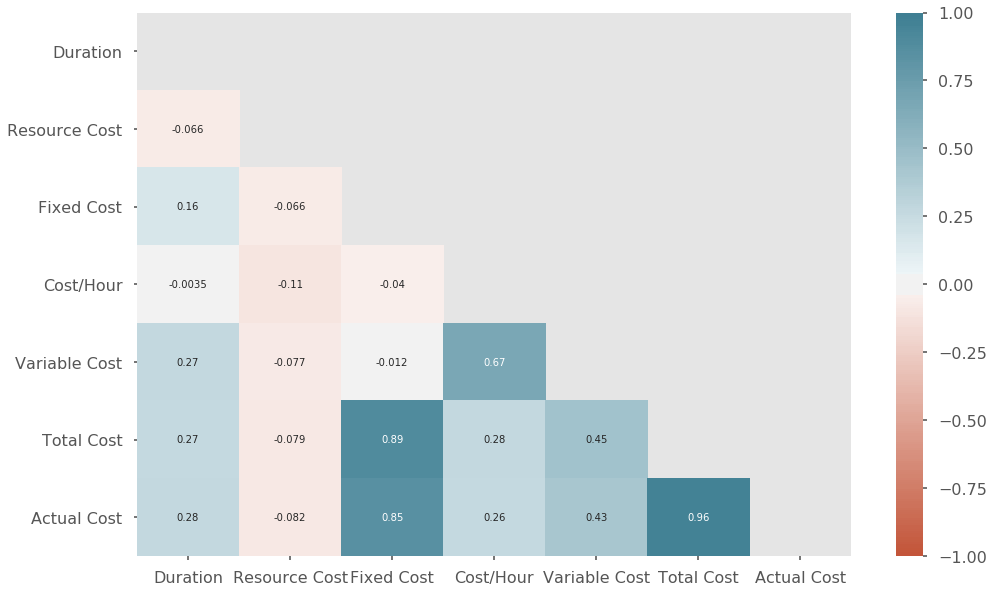

In [16]:
fig = plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask=mask,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),annot=True)
plt.savefig('heatmap.png')

In [16]:
df = df[df['Actual Cost']!=df['Total Cost']]
df.to_excel('test.xlsx')

3188 final rows of final data by removing outliers for all features

In [14]:
df.to_excel('final_data.xlsx')

## Creating Visualizations after outlier removal


In [82]:
name = 'Resource Cost'
resouce_cost = df[df[name]>0][name]
df_resouce = pd.DataFrame(resouce_cost)
for i in range(3):
    df_resouce = remove_outliers(df_resouce,[name])

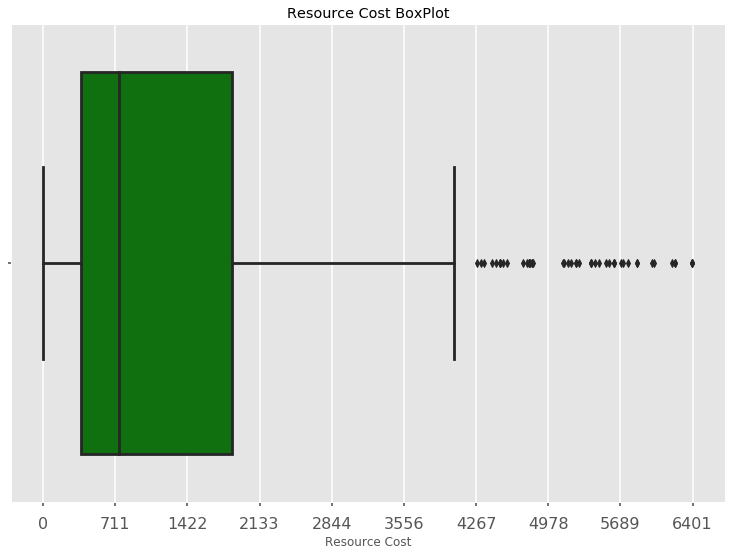

In [83]:
plt.title(name +' BoxPlot')
sns.boxplot(df_resouce[name],color='green')
plt.xticks(np.linspace(min(df_resouce[name]),max(df_resouce[name]) +1 ,10,dtype=int))
plt.savefig('boxplot-'+name+'.png')

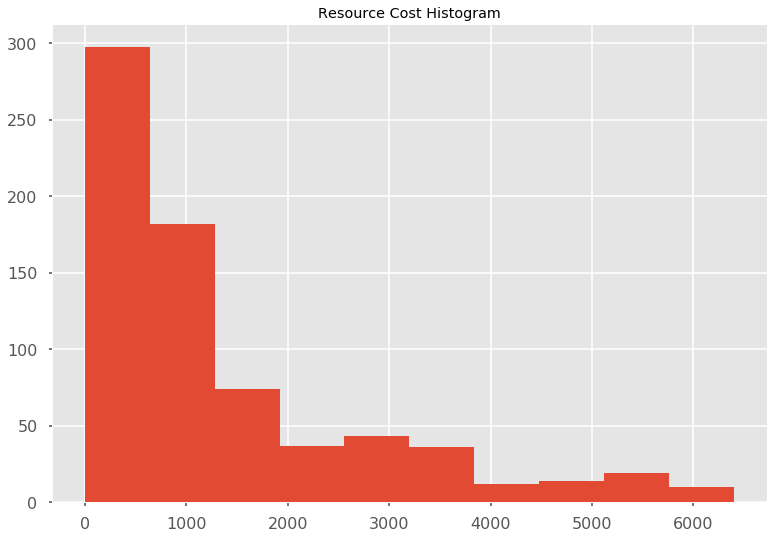

In [84]:
plt.title(name+' Histogram')
plt.hist(df_resouce[name])
plt.savefig('histogram-'+name+'.png')


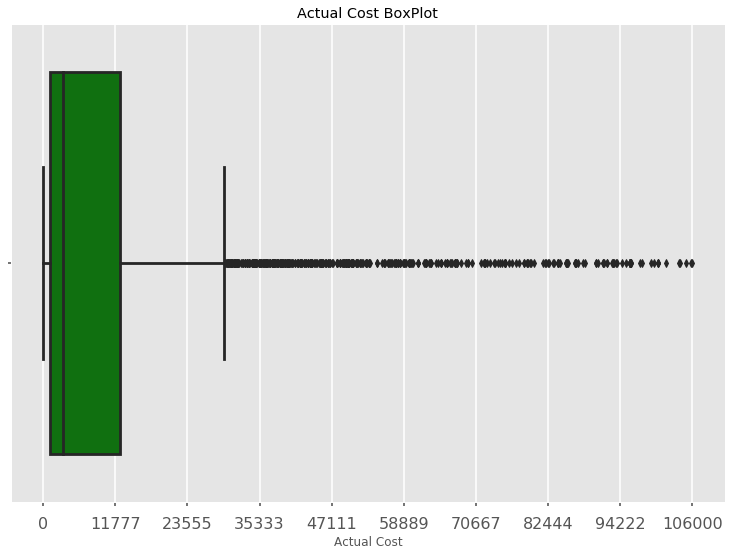

In [114]:
plt.title('Actual Cost BoxPlot')
sns.boxplot(df['Actual Cost'],color='green')
plt.xticks(np.linspace(min(df['Actual Cost']),max(df['Actual Cost']) +1 ,10,dtype=int))
plt.savefig('boxplot-Actual Cost.png')

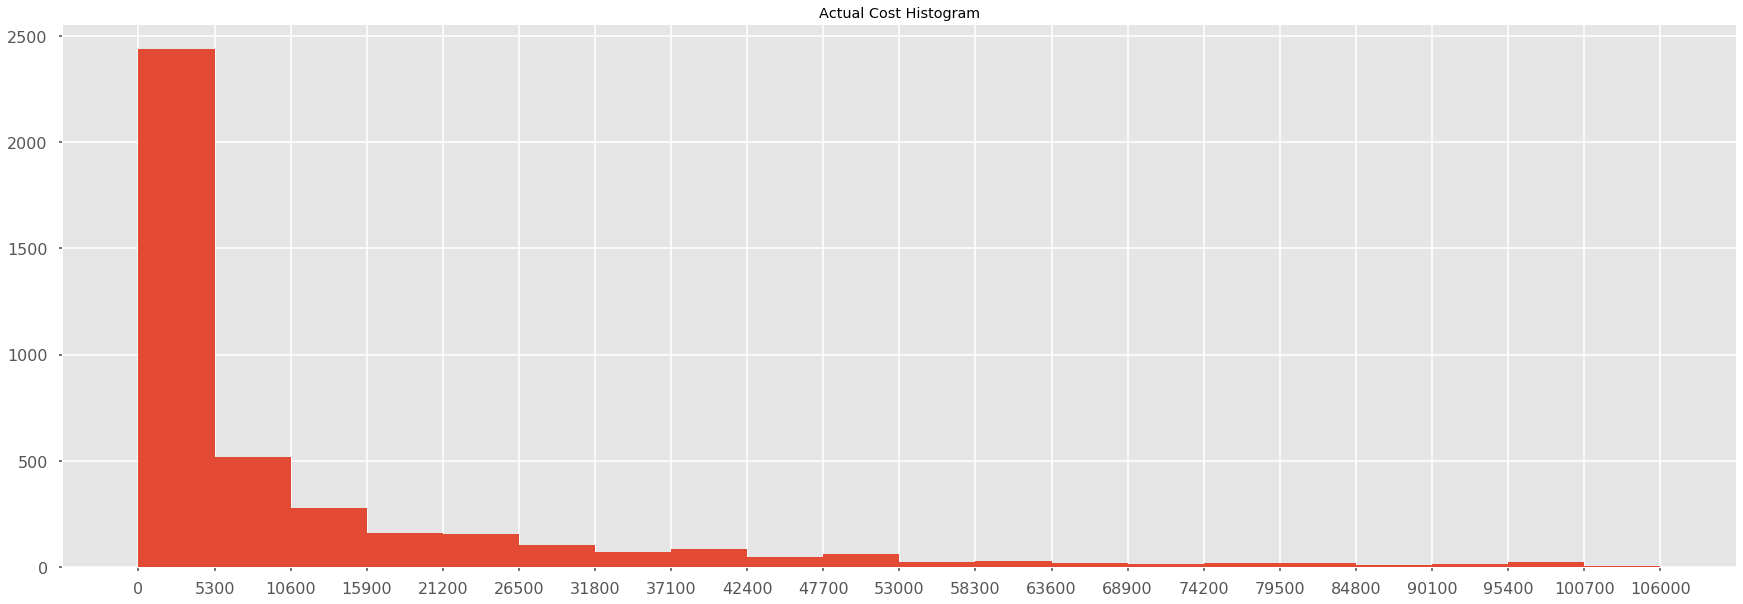

In [116]:
fig = plt.figure(figsize = (30,10))
plt.title('Actual Cost Histogram')
n,bins,patches = plt.hist(df['Actual Cost'],bins=20)
plt.xticks(list(bins))
plt.savefig('histogram-Actual Cost.png')

In [94]:
max(df['Total Cost'])

99800.0

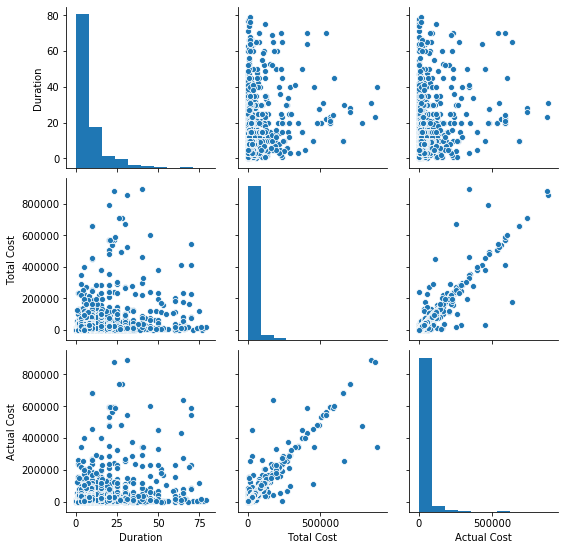

In [12]:
# After removing all outliers
columns = ['Actual Cost','Total Cost','Duration']
for column in columns:
    df = df.drop(columns = ['z-score '+ column])
sns.pairplot(df)



<Figure size 1440x720 with 0 Axes>

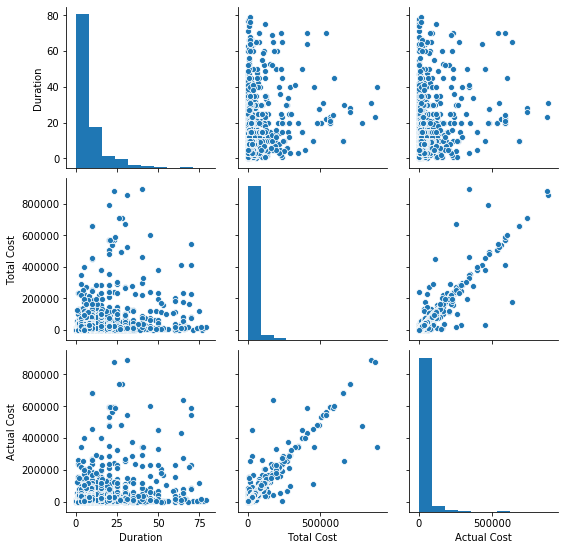

In [15]:
plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.savefig('pariplot-after-removing-outliers.png')

In [5]:
df.to_excel('data-2.xlsx')
#df.to_excel('data-completely-cleaned.xlsx')

<bound method NDFrame.describe of       Duration  Total Cost  Actual Cost
0          3.0      2400.0       2400.0
1          1.0       800.0        800.0
2          1.0       440.0        440.0
3          1.0       800.0        800.0
4          1.0       800.0        800.0
...        ...         ...          ...
4637       5.0      8340.0       9081.0
4638       8.0     29193.0      31170.0
4639      15.0     25022.0      22889.0
4640       8.0     31278.0      31165.0
4641       5.0       920.0        901.0

[3783 rows x 3 columns]>